#Air quality: an Exploratory Data Analysis Project
This repository contains an exploratory data analysis (EDA) project focused on understanding air quality trends and their relationship with weather conditions. Using the Air Quality Dataset from the UCI Machine Learning Repository, the project applies data cleaning, visualization, and statistical techniques to uncover patterns and insights.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# - 1 Loading Data
aiq_data = pd.read_csv('air+quality_ds/AirQualityUCI.csv', delimiter=';')
# Data source: https://archive.ics.uci.edu/dataset/360/air+quality

# Loading data info from the source website
data_info_raw = pd.read_html('https://archive.ics.uci.edu/dataset/360/air+quality')[0]
data_info_raw.head(30)


,Variable Name,Role,Type,Description,Units,Missing Values
0,Date,Feature,Date,NaN,NaN,no
1,Time,Feature,Categorical,NaN,NaN,no
2,CO(GT),Feature,Integer,True hourly averaged concentration CO in mg/m^...,mg/m^3,no
3,PT08.S1(CO),Feature,Categorical,hourly averaged sensor response (nominally CO ...,NaN,no
4,NMHC(GT),Feature,Integer,True hourly averaged overall Non Metanic Hydro...,microg/m^3,no
5,C6H6(GT),Feature,Continuous,True hourly averaged Benzene concentration in ...,microg/m^3,no
6,PT08.S2(NMHC),Feature,Categorical,hourly averaged sensor response (nominally NMH...,NaN,no
7,NOx(GT),Feature,Integer,True hourly averaged NOx concentration in ppb ...,ppb,no
8,PT08.S3(NOx),Feature,Categorical,hourly averaged sensor response (nominally NOx...,NaN,no
9,NO2(GT),Feature,Integer,True hourly averaged NO2 concentration in micr...,microg/m^3,no


In [24]:

# - Backup
aiq_data_bk = aiq_data.copy()

# - First look
print(aiq_data.head())

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578         

In [25]:
aiq_data.info()
aiq_data.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


,count,mean,std,min,25%,50%,75%,max
PT08.S1(CO),9357.0,1048.990061,329.832710,-200.0,921.0,1053.0,1221.0,2040.0
NMHC(GT),9357.0,-159.090093,139.789093,-200.0,-200.0,-200.0,-200.0,1189.0
PT08.S2(NMHC),9357.0,894.595276,342.333252,-200.0,711.0,895.0,1105.0,2214.0
NOx(GT),9357.0,168.616971,257.433866,-200.0,50.0,141.0,284.0,1479.0
PT08.S3(NOx),9357.0,794.990168,321.993552,-200.0,637.0,794.0,960.0,2683.0
NO2(GT),9357.0,58.148873,126.940455,-200.0,53.0,96.0,133.0,340.0
PT08.S4(NO2),9357.0,1391.479641,467.210125,-200.0,1185.0,1446.0,1662.0,2775.0
PT08.S5(O3),9357.0,975.072032,456.938184,-200.0,700.0,942.0,1255.0,2523.0
Unnamed: 15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 16,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# - 2 Data Cleaning
# deleting unnecessary columns
# deleting column 15 and 16 from aiq_data dataframe if they exist
columns_to_drop = ['Unnamed: 15', 'Unnamed: 16']
aiq_data.drop(columns=[col for col in columns_to_drop if col in aiq_data.columns], inplace=True)
aiq_data.head(24) # check if the data is sampled hourly on 24-hours basis


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
5,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848"
6,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603"
7,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702"
8,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648"
9,11/03/2004,03.00.00,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517"


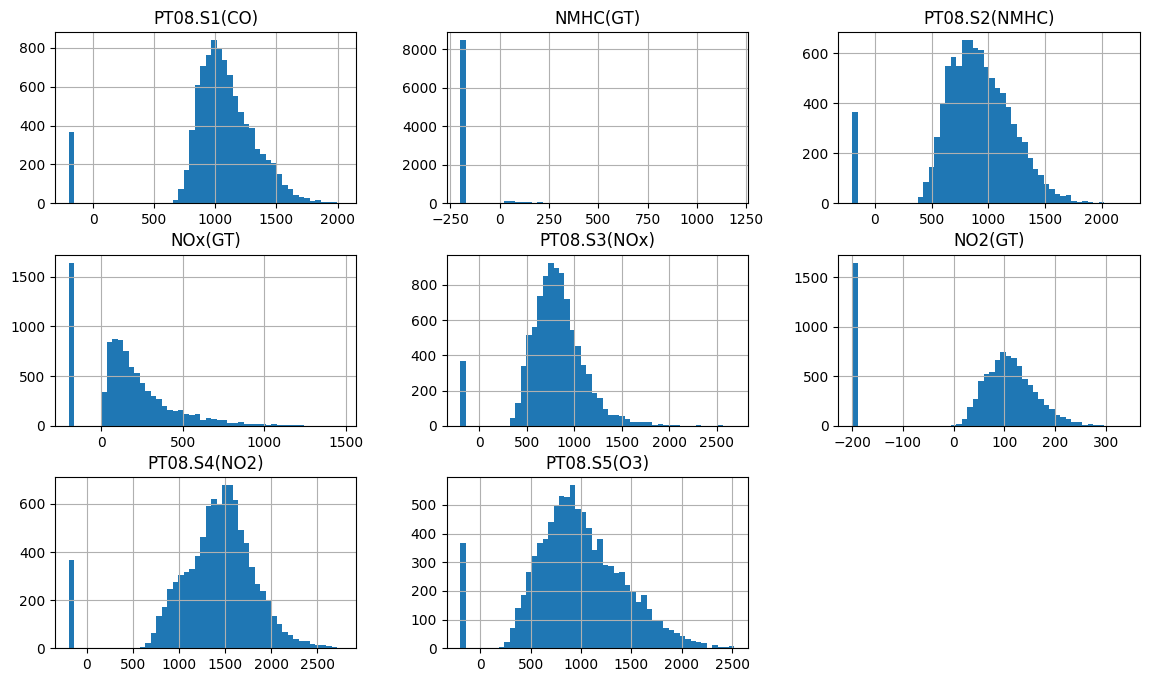

In [30]:
aiq_data.hist(bins=50, figsize=(14,8))
plt.show()

## Data cleaning: clipped data
As shown in the graphs generated there is evidency of data-clipping.
